In [208]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sn
from scipy.io import loadmat

In [201]:
# Question 1
# Creating Synthetic images for evaluation of the segmentation process
im1 = np.zeros((512,512), dtype='uint8')
im2 = np.zeros((512,512), dtype='uint8')
im3 = np.zeros((512,512), dtype='uint8')
im4 = np.zeros((512,512), dtype='uint8')
im5 = np.zeros((512,512), dtype='uint8')
im6 = np.zeros((512,512), dtype='uint8')
im7 = np.zeros((512,512), dtype='uint8')
im8 = np.zeros((512,512), dtype='uint8')
membership_arr1 =  np.zeros([512,512])
membership_arr2 =  np.zeros([512,512])
for i in range(512):
    for j in range(512):
        if i<256:
            if j<256:
                im1[i][j]=np.random.normal(50, 0, 1)
                im2[i][j]=np.random.normal(50, 10, 1)
                membership_arr1[i][j]=0
            else:
                im1[i][j]=np.random.normal(150, 0, 1)
                im2[i][j]=np.random.normal(150, 10, 1)
                membership_arr1[i][j]=2
        else:
            if j<256:
                im1[i][j]=np.random.normal(100, 0, 1)
                im2[i][j]=np.random.normal(100, 10, 1)
                membership_arr1[i][j]=1
            else:
                im1[i][j]=np.random.normal(200, 0, 1)
                im2[i][j]=np.random.normal(200, 10, 1)
                membership_arr1[i][j]=3

for i in range(512):
    for j in range(512):
        if i<256:
            if j>280 and j<300:
                im5[i][j]=np.random.normal(150, 0, 1)
                im8[i][j]=np.random.normal(150, 20, 1)
                membership_arr2[i][j] = 2
            elif j>400 and j<480:
                im5[i][j]=np.random.normal(200, 0, 1)
                im8[i][j]=np.random.normal(200, 20, 1)
                membership_arr2[i][j] = 3
            else:
                im5[i][j]=np.random.normal(50, 0, 1)
                im8[i][j]=np.random.normal(50, 20, 1)
                membership_arr2[i][j] = 0
        else:
            if j>280 and j<300:
                im5[i][j]=np.random.normal(150, 0, 1)
                im8[i][j]=np.random.normal(150, 20, 1)
                membership_arr2[i][j] = 2
            elif j>400 and j<480:
                im5[i][j]=np.random.normal(200, 0, 1)
                im8[i][j]=np.random.normal(200, 20, 1)
                membership_arr2[i][j] = 3
            else:
                im5[i][j]=np.random.normal(100, 0, 1)
                im8[i][j]=np.random.normal(100, 20, 1)
                membership_arr2[i][j] = 1

Image.fromarray(im8).show()

# plt.imsave("/Users/amrabuelfadl/Desktop/image1.jpg", im1, cmap = 'gray')

# plt.imsave("/Users/amrabuelfadl/Desktop/image2.jpg", im2, cmap = 'gray')

# plt.imsave("/Users/amrabuelfadl/Desktop/image5.jpg",im5, cmap = 'gray')

# plt.imsave("/Users/amrabuelfadl/Desktop/image8.jpg",im8, cmap = 'gray')

In [164]:
def euclideanDistND(pixel,center):
    sum_square = 0
    for i in range (0,len(center)):
        sum_square += ((pixel[i] - center[i]) ** 2)
    return np.sqrt(sum_square)

In [165]:
def euclideanDist1D(pixel,center):
    sum_square = ((pixel - center) ** 2)
    return np.sqrt(sum_square)

In [166]:
# Question 2
def kmeans(img,dim,k,c):
    img_copy = np.array(img)
    img_result = img.copy()
    arr_result =  np.zeros([k,dim])
    arr_result_counter =  np.zeros([k,dim])
    best_center = -1
    min_dist = np.inf
    current_dis = 0
    membership = np.array(img)
    membershipOld = np.array(img)
    converged = False
    counter = 0
#     print(arr_result)
    while not converged:
        membershipOld = membership
        for i in range (0,img_copy.shape[0]): # creating the s matrix
            for j in range (0,img_copy.shape[1]):
                for l in range (0,len(c)):
                    #print(img_copy[i][j][0])
                    #current_dis = np.linalg.norm(img_copy[i][j]-c[l])
                    if dim == 1:
                        current_dis = euclideanDist1D(img_copy[i][j], c[l])
                    else:
                        current_dis = euclideanDistND(img_copy[i][j], c[l])
                    if(current_dis<min_dist):
                        min_dist = current_dis
                        best_center = l
                        membership[i][j] = l
                min_dist = np.inf
                current_dis = 0
                arr_result[best_center]+= img_copy[i][j]
                arr_result_counter[best_center]+= 1
                
        if dim == 1:
            for k in range (0,len(c)):
                    if arr_result_counter[k] != 0:
                        c[k] = arr_result[k]//arr_result_counter[k]
        else:
            for k in range (0,len(c)):
                  c[k] = np.divide(arr_result[k], arr_result_counter[k])
                       
        if (counter > 0) & ((membershipOld == membership).all()):
            converged = True
        counter += 1
        arr_result.fill(0)
        arr_result_counter.fill(0)
    return membership

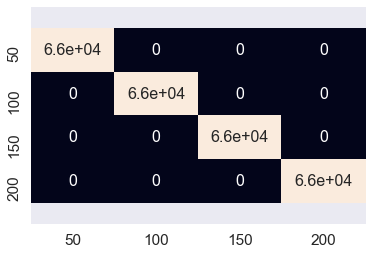

In [202]:
# ّImage 1 test Group D
image = Image.open("image1.jpg")

d_confusion_matrix=confusion_matrix(kmeans(image,1,4,[30, 70, 130, 200]).flatten(), membership_arr1.flatten())

df_cm = pd.DataFrame(d_confusion_matrix, [50,100,150,200], [50,100,150,200])

sn.set(font_scale=1.4) # for label size

ax=sn.heatmap(df_cm,xticklabels=True, yticklabels=True, annot=True, cbar=False,annot_kws={"size": 16}) # font size

bottom, top = ax.get_ylim()

ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

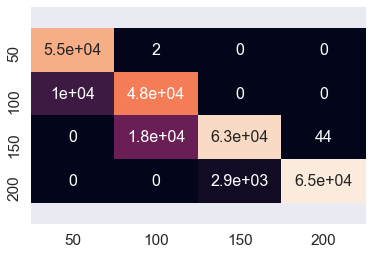

In [203]:
# ّImage 2 test Group D

image = Image.open("image2.jpg")

d_confusion_matrix=confusion_matrix(kmeans(image,1,4,[30, 70, 130, 200]).flatten(), membership_arr1.flatten())

df_cm = pd.DataFrame(d_confusion_matrix, [50,100,150,200], [50,100,150,200])

sn.set(font_scale=1.4) # for label size

ax=sn.heatmap(df_cm,xticklabels=True, yticklabels=True, annot=True, cbar=False,annot_kws={"size": 16}) # font size

bottom, top = ax.get_ylim()

ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

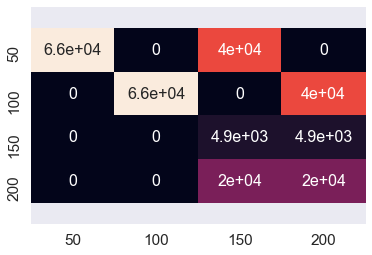

In [204]:
# ّImage 5 test Group D

image = Image.open("image5.jpg")

d_confusion_matrix=confusion_matrix(kmeans(image,1,4,[30, 70, 130, 200]).flatten(), membership_arr1.flatten())

df_cm = pd.DataFrame(d_confusion_matrix, [50,100,150,200], [50,100,150,200])

sn.set(font_scale=1.4) # for label size

ax=sn.heatmap(df_cm,xticklabels=True, yticklabels=True, annot=True, cbar=False,annot_kws={"size": 16}) # font size

bottom, top = ax.get_ylim()

ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

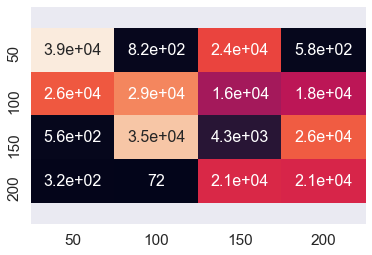

In [205]:
# ّImage 8 test Group D

image = Image.open("image8.jpg")

d_confusion_matrix=confusion_matrix(kmeans(image,1,4,[30, 70, 130, 200]).flatten(), membership_arr1.flatten())

df_cm = pd.DataFrame(d_confusion_matrix, [50,100,150,200], [50,100,150,200])

sn.set(font_scale=1.4) # for label size

ax=sn.heatmap(df_cm,xticklabels=True, yticklabels=True, annot=True, cbar=False,annot_kws={"size": 16}) # font size

bottom, top = ax.get_ylim()

ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

In [206]:
# GrayLevel image Group D

image = Image.open("3096 (1).jpg")
kmeans(image,1,4,[30, 70, 130, 200])

array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=uint8)

In [207]:
# RGB image Group D

image = Image.open("3096.jpg")
kmeans(image,3,4,[[2, 71, 181], [193, 253, 111], [102, 181, 19], [92, 165, 221]])

array([[[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[2, 2, 2],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [243]:
# Question 4

x = loadmat('SalinasA_Q4.mat')
originalData = x['Q4']

y = loadmat('SalinasA_GT4.mat')
groundTruth = y['Q4_GT']


In [244]:
groundTruth.shape

(42, 43)

In [245]:
groundTruth

array([[237, 237, 237, ...,   0,   0,   0],
       [237, 237, 237, ...,   0, 182, 182],
       [237, 237, 237, ..., 182, 182, 182],
       ...,
       [182, 182, 182, ...,   0,   0,   0],
       [182, 182, 182, ...,   0,   0,   0],
       [182, 182, 182, ...,   0,   0,   0]], dtype=uint8)

In [246]:
reshapedData = originalData.reshape(originalData.shape[0]*originalData.shape[1],originalData.shape[2])

In [258]:
#Generating random numbers for centroids
center1 = np.random.randint(0,5606,204)
center2 = np.random.randint(0,5606,204)
center3 = np.random.randint(0,5606,204)
center4 = np.random.randint(0,5606,204)

In [248]:
kmeans(originalData,204,7,[center1, center2, center3, center4])

/Users/amrabuelfadl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


array([[[3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3]],

       [[3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3]],

       [[3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3]],

       ...,

       [[3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3]],

       [[3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [3, 3, 3, ..., 

/Users/amrabuelfadl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


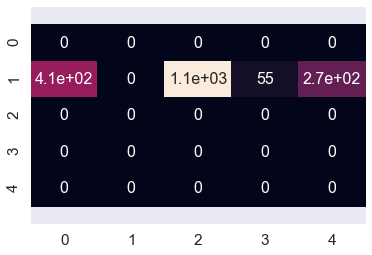

In [266]:

#d_confusion_matrix=confusion_matrix(kmeans(originalData,204,7,[center1, center2, center3, center4]).flatten(), groundTruth.flatten())
d_confusion_matrix=confusion_matrix(np.average(kmeans(originalData,204,7,[center1, center2, center3, center4]), axis = 2).flatten(), groundTruth.flatten())

#d_confusion_matrix=confusion_matrix(np.average(kmeans(reshapedData,1,7,[20, 460, 901, 1700, 2500, 3500, 4900]), axis = 1), groundTruth.flatten())



df_cm = pd.DataFrame(d_confusion_matrix, [0, 1, 2, 3, 4],  [0, 1, 2, 3, 4])

sn.set(font_scale=1.4) # for label size

ax=sn.heatmap(df_cm,xticklabels=True, yticklabels=True, annot=True, cbar=False,annot_kws={"size": 16}) # font size

bottom, top = ax.get_ylim()

ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()